# Streaming Catalog – Advanced Exploratory Visualizations

This notebook extends the original project with:
- Advanced visualizations on the enriched streaming catalog
- KPIs relationships (correlations, bubble charts, boxplots, heatmaps)
- High-level KPI summary for genres, providers and maturity ratings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

DATA_PATH = "../data/processed/streaming_catalog_enriched.csv"

catalog = pd.read_csv(DATA_PATH)
catalog.head()

,title_id,title_name,genre,release_year,origin_country,original_language,duration_min,age_rating,imdb_rating,provider,...,date_added,total_views,unique_viewers,avg_watch_duration,completion_rate,rewatch_rate,popularity_score,engagement_score,recency_years,maturity
0,1,Title 1,Comedy,1981,DE,German,97,PG,7.6,Netflux,...,2022-08-03,30,30,99.033333,0.500000,0.266667,94.333333,2.287629,44,PG
1,2,Title 2,Romance,1985,JP,Japanese,48,G,6.8,Netflux,...,2017-06-14,22,22,92.954545,0.409091,0.318182,83.563636,3.072917,40,G
2,3,Title 3,Thriller,2012,JP,English,90,NC-17,6.7,Streamio,...,2017-06-21,19,19,93.736842,0.473684,0.157895,76.478947,2.146784,13,NC-17
3,4,Title 4,Horror,2017,DE,English,80,R,6.7,CinemaNow,...,2018-02-12,19,19,106.210526,0.421053,0.105263,71.215789,2.275000,8,R
4,5,Title 5,Action,1993,ES,Italian,63,R,8.9,Netflux,...,2019-01-10,25,25,94.760000,0.560000,0.280000,101.500000,2.904127,32,R


### Key Composite KPIs

- **Popularity Score** combines reach and perceived quality
- **Engagement Score** reflects depth of consumption and retention

The following charts use these KPIs for comparative analysis.

In [3]:
def plot_total_views_by_genre(df: pd.DataFrame):
    genre_views = (
        df.groupby("genre")["total_views"]
        .sum()
        .sort_values(ascending=False)
    )

    out = genre_views.reset_index()
    out.columns = ["genre", "total_views"]

    fig = px.bar(out, x="genre", y="total_views", title="Total Views by Genre", text="total_views")
    fig.update_traces(texttemplate="%{text:.3s}", textposition="outside")
    fig.update_layout(
        template="plotly_white",
        xaxis_title="Genre",
        yaxis_title="Total Views",
        xaxis_tickangle=-35,
        margin=dict(t=70, l=40, r=20, b=80),
    )
    fig.show()
plot_total_views_by_genre(catalog)

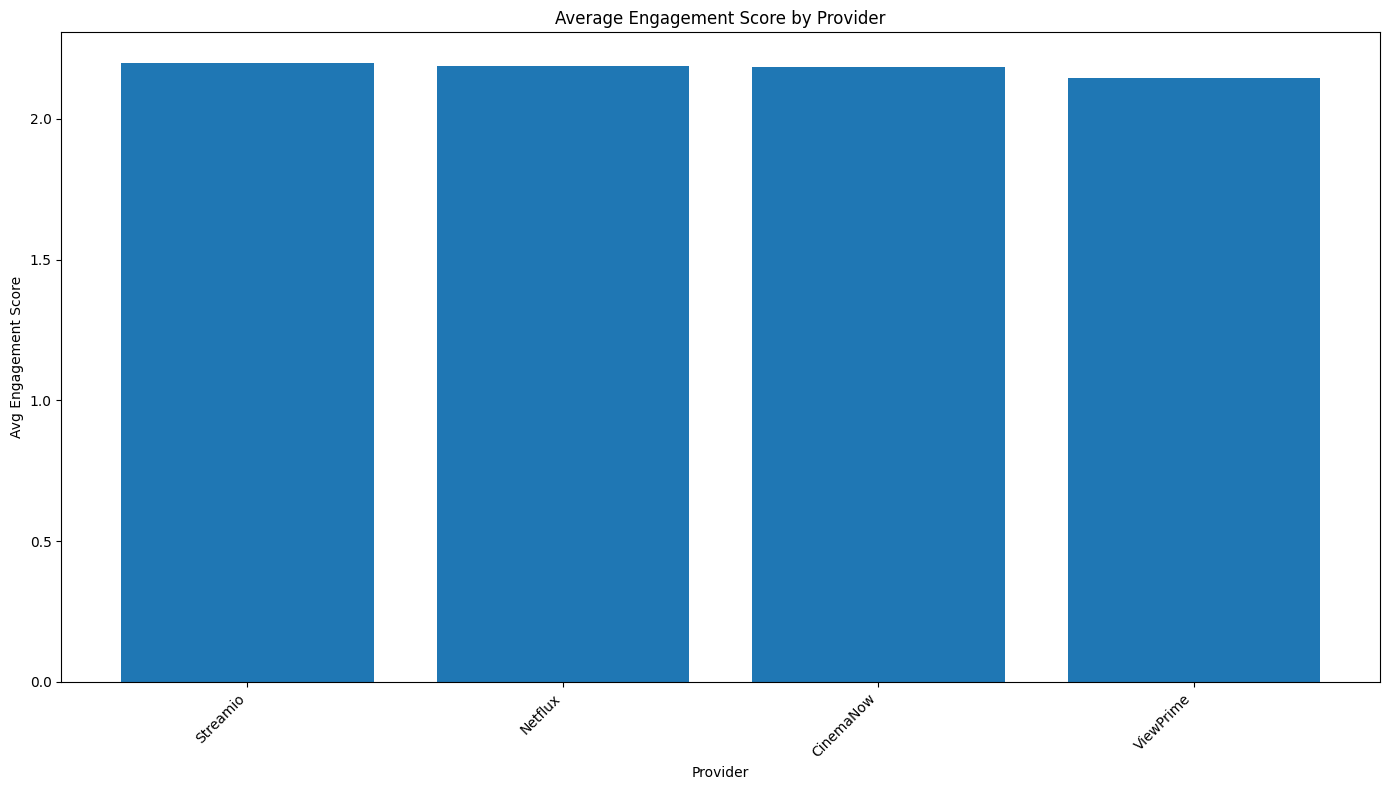

In [7]:
def plot_avg_engagement_by_provider(df: pd.DataFrame):
    provider_engagement = (
        df.groupby("provider")["engagement_score"]
        .mean()
        .sort_values(ascending=False)
    )
    plt.figure(figsize=(14, 8))
    plt.bar(provider_engagement.index, provider_engagement.values)
    plt.xticks(rotation=45, ha="right")
    plt.title("Average Engagement Score by Provider")
    plt.xlabel("Provider")
    plt.ylabel("Avg Engagement Score")
    plt.tight_layout()
    plt.show()
    
plot_avg_engagement_by_provider(catalog)


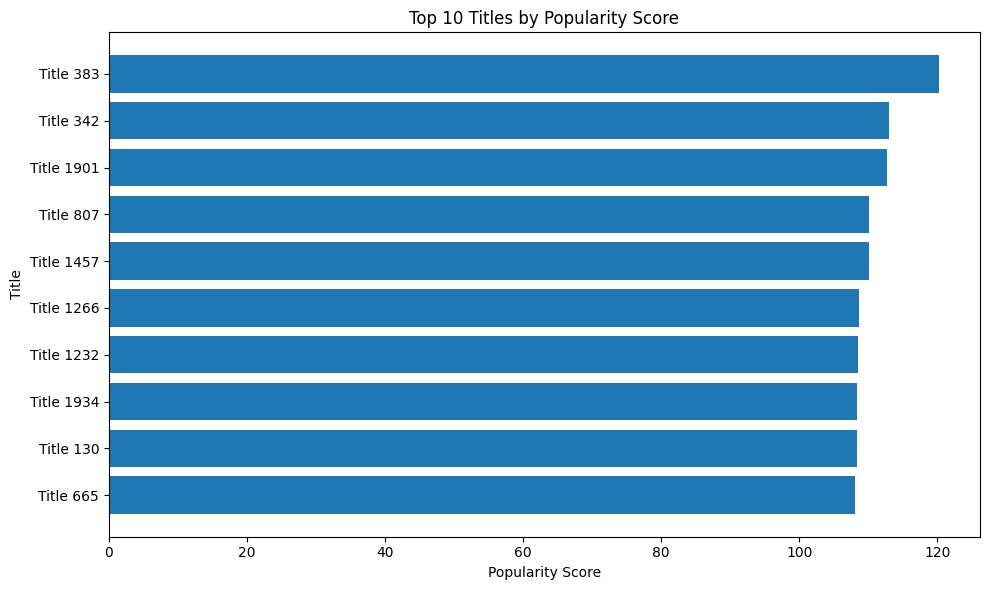

In [5]:
def plot_top10_popularity(df: pd.DataFrame, n: int = 10):
    top_pop = (
        df[["title_name", "popularity_score"]]
        .sort_values("popularity_score", ascending=False)
        .head(n)
    )
    plt.figure(figsize=(10, 6))
    plt.barh(top_pop["title_name"], top_pop["popularity_score"])
    plt.gca().invert_yaxis()
    plt.title(f"Top {n} Titles by Popularity Score")
    plt.xlabel("Popularity Score")
    plt.ylabel("Title")
    plt.tight_layout()
    plt.show()
plot_top10_popularity(catalog, n=10)

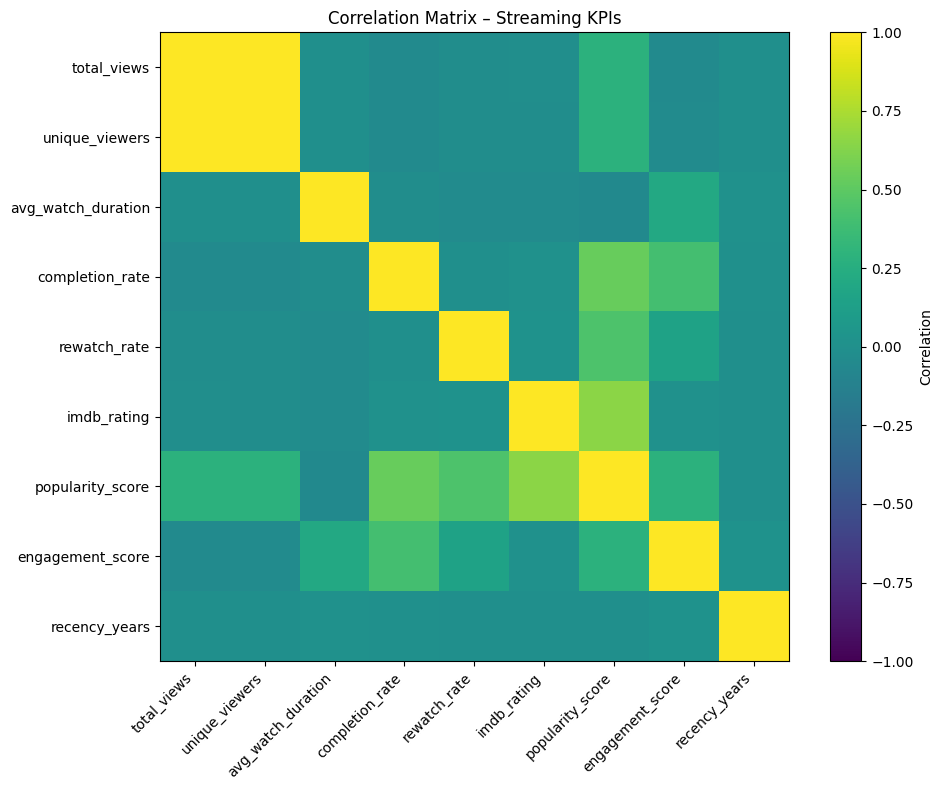

In [30]:
def plot_correlation_heatmap(df: pd.DataFrame):
    num_cols = [
        "total_views",
        "unique_viewers",
        "avg_watch_duration",
        "completion_rate",
        "rewatch_rate",
        "imdb_rating",
        "popularity_score",
        "engagement_score",
        "recency_years",
    ]
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    im = plt.imshow(corr, vmin=-1, vmax=1)
    plt.colorbar(im, label="Correlation")
    plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation Matrix – Streaming KPIs")
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(catalog)

In [2]:
def plot_imdb_vs_completion_bubble(df: pd.DataFrame):
    # Keep only clean rows for plotting
    d = df.dropna(subset=["imdb_rating", "completion_rate", "total_views"]).copy()

    fig = px.scatter(
        d,
        x="imdb_rating",
        y="completion_rate",
        size="total_views",
        size_max=45,
        hover_name="title_name",
        hover_data={
            "genre": True,
            "provider": True,
            "origin_country": True,
            "total_views": ":,",
            "unique_viewers": ":,",
            "imdb_rating": True,
            "completion_rate": True,
        },
        title="IMDb Rating vs Completion Rate (bubble size = Total Views)",
    )

    fig.update_layout(
        template="plotly_white",
        xaxis_title="IMDb Rating",
        yaxis_title="Completion Rate",
        margin=dict(t=70, l=40, r=20, b=50),
    )

    fig.show()
plot_imdb_vs_completion_bubble(catalog)

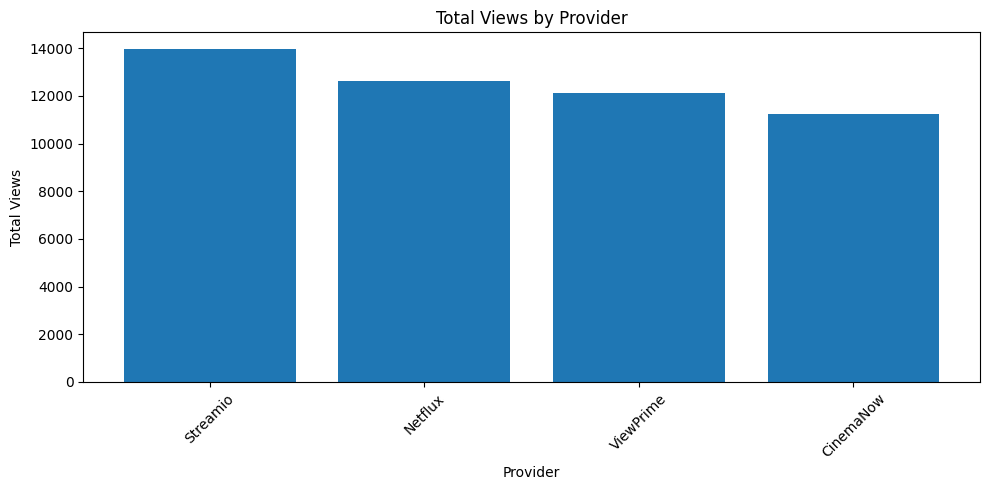

In [32]:
def plot_total_views_by_provider(df: pd.DataFrame):
    provider_views = (
        df.groupby("provider")["total_views"]
        .sum()
        .sort_values(ascending=False)
    )
    plt.figure(figsize=(10, 5))
    plt.bar(provider_views.index, provider_views.values)
    plt.xticks(rotation=45)
    plt.title("Total Views by Provider")
    plt.xlabel("Provider")
    plt.ylabel("Total Views")
    plt.tight_layout()
    plt.show()
plot_total_views_by_provider(catalog)

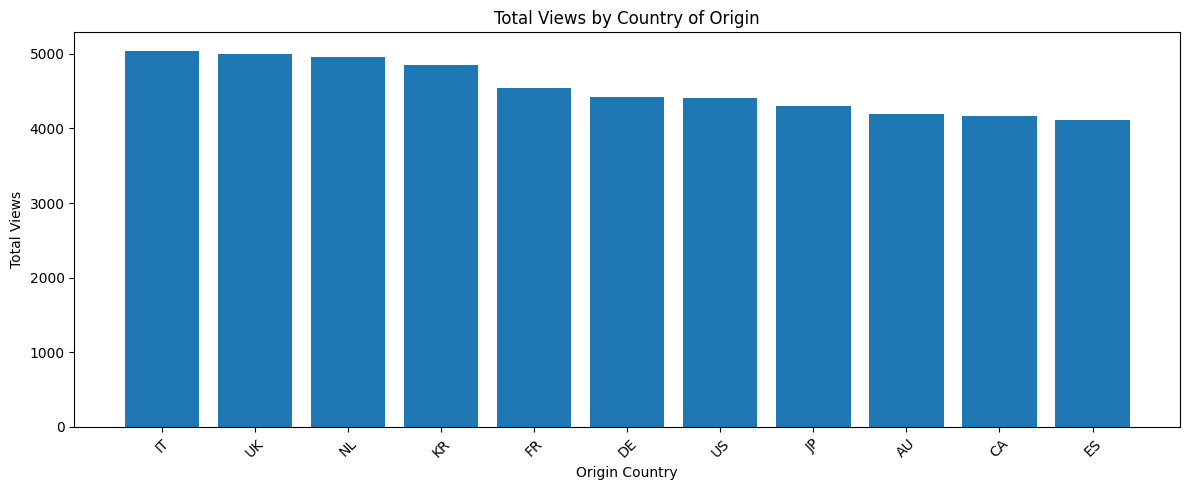

In [33]:
def plot_total_views_by_country(df: pd.DataFrame):
    country_views = (
        df.groupby("origin_country")["total_views"]
        .sum()
        .sort_values(ascending=False)
    )
    plt.figure(figsize=(12, 5))
    plt.bar(country_views.index, country_views.values)
    plt.xticks(rotation=45)
    plt.title("Total Views by Country of Origin")
    plt.xlabel("Origin Country")
    plt.ylabel("Total Views")
    plt.tight_layout()
    plt.show()
plot_total_views_by_country(catalog)

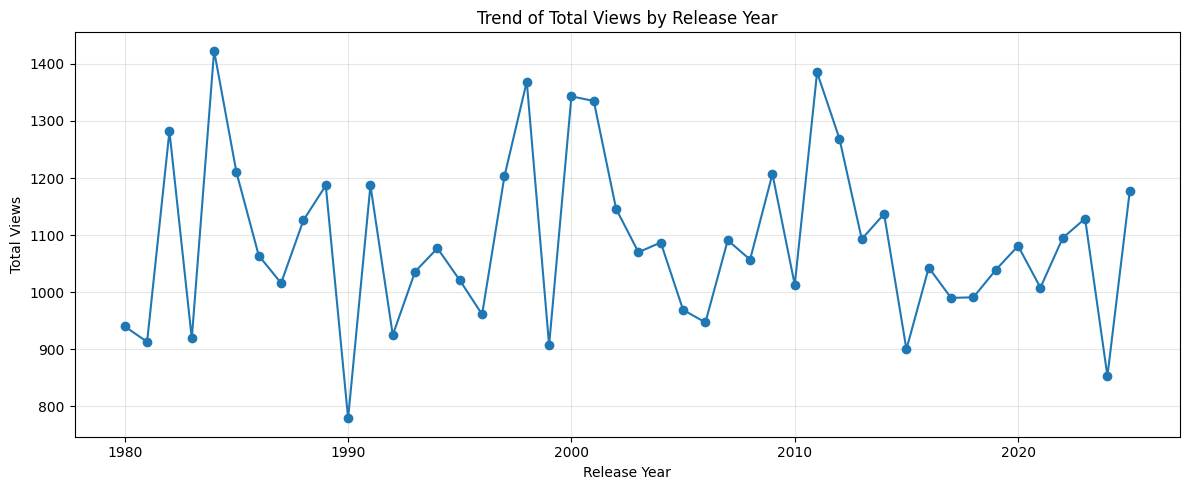

In [34]:
def plot_trend_views_by_release_year(df: pd.DataFrame):
    year_views = df.groupby("release_year")["total_views"].sum()
    plt.figure(figsize=(12, 5))
    plt.plot(year_views.index, year_views.values, marker="o")
    plt.title("Trend of Total Views by Release Year")
    plt.xlabel("Release Year")
    plt.ylabel("Total Views")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
plot_trend_views_by_release_year(catalog)

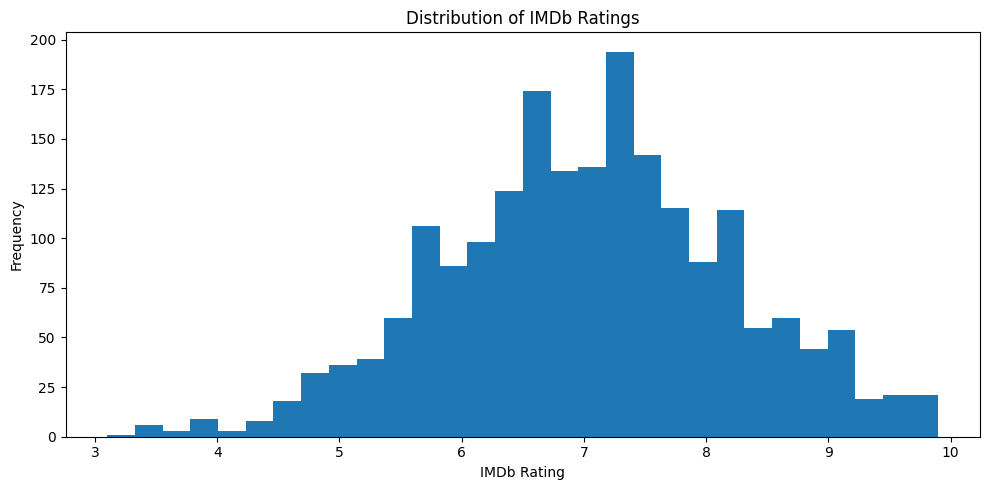

In [9]:
def plot_imdb_distribution(df: pd.DataFrame, bins: int = 20):
    plt.figure(figsize=(10, 5))
    plt.hist(df["imdb_rating"], bins=bins)
    plt.title("Distribution of IMDb Ratings")
    plt.xlabel("IMDb Rating")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
plot_imdb_distribution(catalog, bins=30)

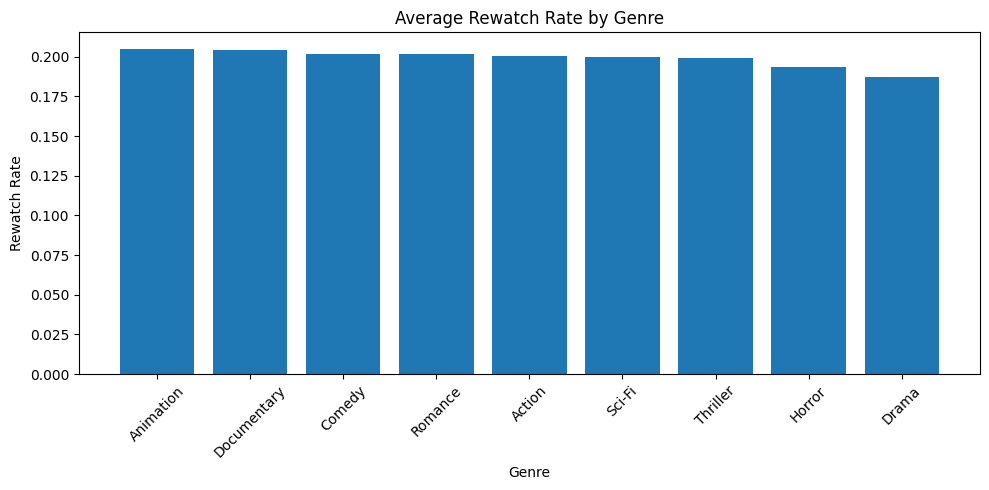

In [36]:
def plot_avg_rewatch_by_genre(df: pd.DataFrame):
    genre_rewatch = (
        df.groupby("genre")["rewatch_rate"]
        .mean()
        .sort_values(ascending=False)
    )
    plt.figure(figsize=(10, 5))
    plt.bar(genre_rewatch.index, genre_rewatch.values)
    plt.xticks(rotation=45)
    plt.title("Average Rewatch Rate by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Rewatch Rate")
    plt.tight_layout()
    plt.show()

plot_avg_rewatch_by_genre(catalog)

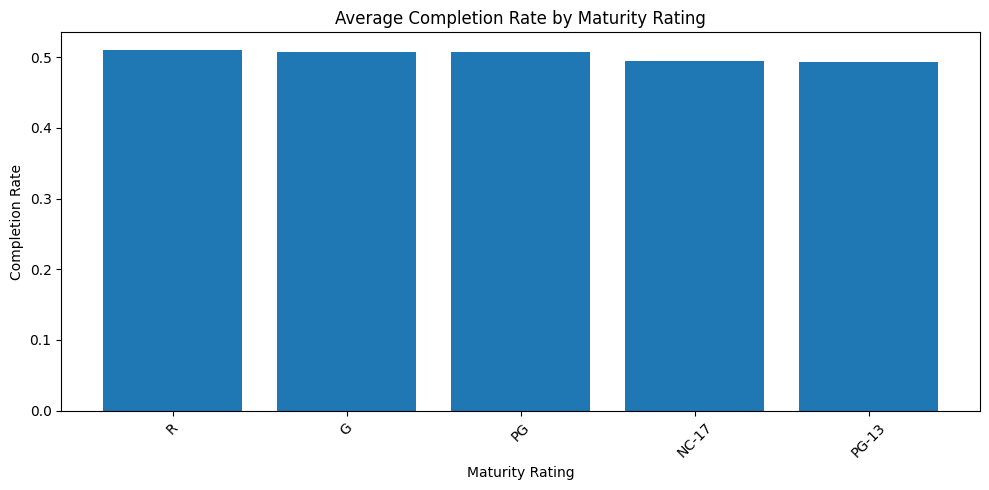

In [37]:
def plot_completion_by_maturity(df: pd.DataFrame):
    maturity_completion = (
        df.groupby("maturity")["completion_rate"]
        .mean()
        .sort_values(ascending=False)
    )
    plt.figure(figsize=(10, 5))
    plt.bar(maturity_completion.index, maturity_completion.values)
    plt.xticks(rotation=45)
    plt.title("Average Completion Rate by Maturity Rating")
    plt.xlabel("Maturity Rating")
    plt.ylabel("Completion Rate")
    plt.tight_layout()
    plt.show()
plot_completion_by_maturity(catalog)

In [38]:
def plot_provider_country_heatmap(df: pd.DataFrame):
    table = df.pivot_table(
        index="origin_country",
        columns="provider",
        values="total_views",
        aggfunc="sum",
        fill_value=0,
    )

    fig = px.imshow(
        table,
        title="Total Views Heatmap: Country of Origin × Provider",
        aspect="auto",
    )

    fig.update_layout(
        template="plotly_white",
        xaxis_title="Provider",
        yaxis_title="Origin Country",
        margin=dict(t=70, l=40, r=20, b=50),
    )

    fig.show()

plot_provider_country_heatmap(catalog)

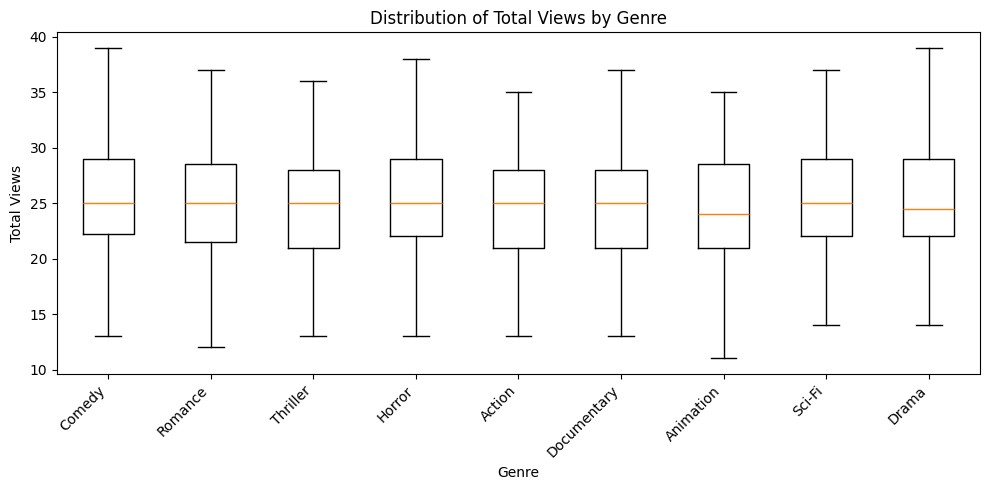

In [39]:
def plot_boxplot_views_by_genre(df: pd.DataFrame):
    genres = df["genre"].unique()
    data = [df[df["genre"] == g]["total_views"] for g in genres]
    plt.figure(figsize=(10, 5))
    plt.boxplot(data, tick_labels=genres, showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribution of Total Views by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Total Views")
    plt.tight_layout()
    plt.show()
plot_boxplot_views_by_genre(catalog)

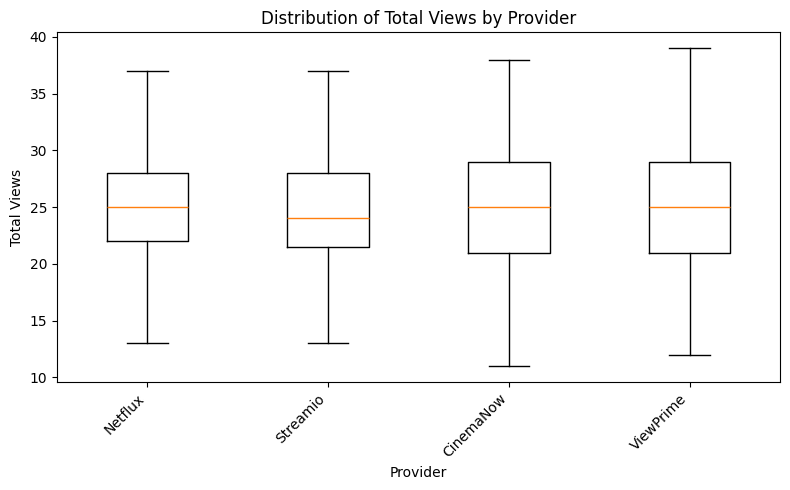

In [40]:
def plot_boxplot_views_by_provider(df: pd.DataFrame):
    providers = df["provider"].unique()
    data = [df[df["provider"] == p]["total_views"] for p in providers]
    plt.figure(figsize=(8, 5))
    plt.boxplot(data, tick_labels=providers, showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribution of Total Views by Provider")
    plt.xlabel("Provider")
    plt.ylabel("Total Views")
    plt.tight_layout()
    plt.show()
plot_boxplot_views_by_provider(catalog)

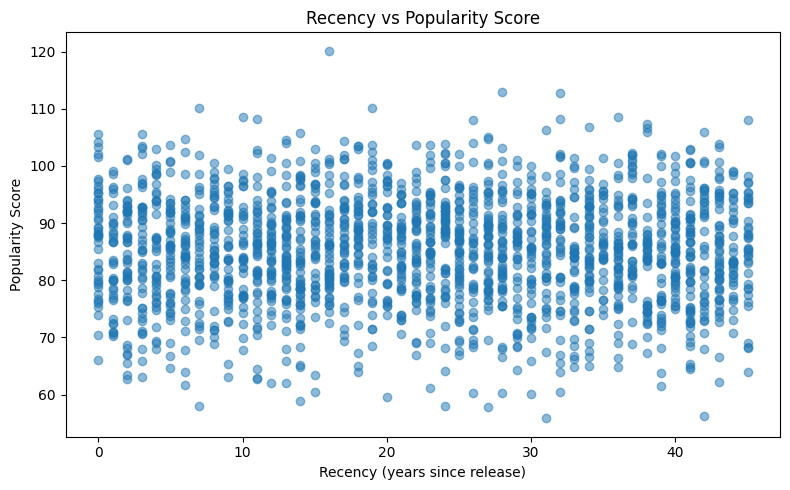

In [41]:
def plot_recency_vs_popularity(df: pd.DataFrame):
    plt.figure(figsize=(8, 5))
    plt.scatter(df["recency_years"], df["popularity_score"], alpha=0.5)
    plt.title("Recency vs Popularity Score")
    plt.xlabel("Recency (years since release)")
    plt.ylabel("Popularity Score")
    plt.tight_layout()
    plt.show()

plot_recency_vs_popularity(catalog)

In [42]:
genre_views = (
    catalog.groupby("genre")["total_views"]
    .sum()
    .sort_values(ascending=False)
)
best_genre = genre_views.index[0]

provider_eng = (
    catalog.groupby("provider")["engagement_score"]
    .mean()
    .sort_values(ascending=False)
)
best_provider = provider_eng.index[0]
best_provider_score = provider_eng.iloc[0]

top_title = catalog.sort_values("popularity_score", ascending=False).iloc[0]

min_views_threshold = catalog["total_views"].median()
high_view_titles = catalog[catalog["total_views"] >= min_views_threshold]
top_imdb = high_view_titles.sort_values("imdb_rating", ascending=False).iloc[0]

maturity_views = (
    catalog.groupby("maturity")["total_views"]
    .sum()
    .sort_values(ascending=False)
)
best_maturity = maturity_views.index[0]

print("Best genre by total views:", best_genre)
print("Best provider by engagement:", best_provider, f"(avg engagement = {best_provider_score:.2f})")
print("Top title by popularity:", top_title["title_name"], f"(popularity_score = {top_title['popularity_score']:.2f})")
print("Highest-rated high-volume title:", top_imdb["title_name"],
      f"(IMDb = {top_imdb['imdb_rating']:.1f}, views = {top_imdb['total_views']})")
print("Maturity with highest views:", best_maturity)


Best genre by total views: Action
Best provider by engagement: Streamio (avg engagement = 2.20)
Top title by popularity: Title 383 (popularity_score = 120.15)
Highest-rated high-volume title: Title 2000 (IMDb = 9.9, views = 35)
Maturity with highest views: R


## High-level KPI Summary

- Best genre by total views: `...`
- Best provider by engagement: `...`
- Top title by popularity: `...`
- Highest-rated high-volume title: `...`
- Maturity rating with the highest total views: `...`

These insights are later used in the business summary (`reports/summary.md`) and in the Power BI dashboard.